Module 3 Case Study Mini-Project
Objective- Apply full data preparation pipeline (EDA → Cleaning → Feature Engineering → Transformation) on the dirty cafe sales dataset.
Dataset- dirty_cafe_sales.csv

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

df = pd.read_csv('dirty_cafe_sales.csv', na_values='?')

num_cols = ['Quantity', 'Price Per Unit', 'Total Spent']
for col in num_cols:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '').str.strip(), errors='coerce')

print(df.dtypes)
display(df.head())

Transaction ID       object
Item                 object
Quantity            float64
Price Per Unit      float64
Total Spent         float64
Payment Method       object
Location             object
Transaction Date     object
dtype: object


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [11]:
df.info()

display(df.describe())

display(df.describe(include=['object']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  object 
 1   Item              9667 non-null   object 
 2   Quantity          9521 non-null   float64
 3   Price Per Unit    9467 non-null   float64
 4   Total Spent       9498 non-null   float64
 5   Payment Method    7421 non-null   object 
 6   Location          6735 non-null   object 
 7   Transaction Date  9841 non-null   object 
dtypes: float64(3), object(5)
memory usage: 625.1+ KB


,Quantity,Price Per Unit,Total Spent
count,9521.000000,9467.000000,9498.000000
mean,3.028463,2.949984,8.924352
std,1.419007,1.278450,6.009919
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,4.000000
50%,3.000000,3.000000,8.000000
75%,4.000000,4.000000,12.000000
max,5.000000,5.000000,25.000000


,Transaction ID,Item,Payment Method,Location,Transaction Date
count,10000,9667,7421,6735,9841
unique,10000,10,5,4,367
top,TXN_1961373,Juice,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2291,3022,159


The Quantity, Price Per Unit, and Total Spent columns contained strings with spaces or commas → these have been changed to floats.
Transaction ID, Item, Payment Method, Location, and Transaction Date are categorical.
There are gaps in numeric and text columns.

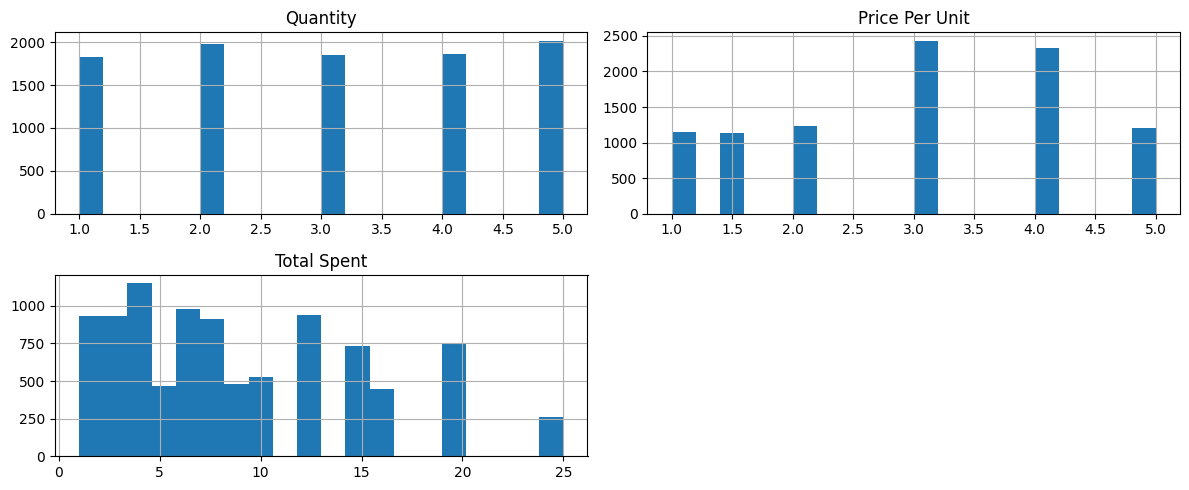

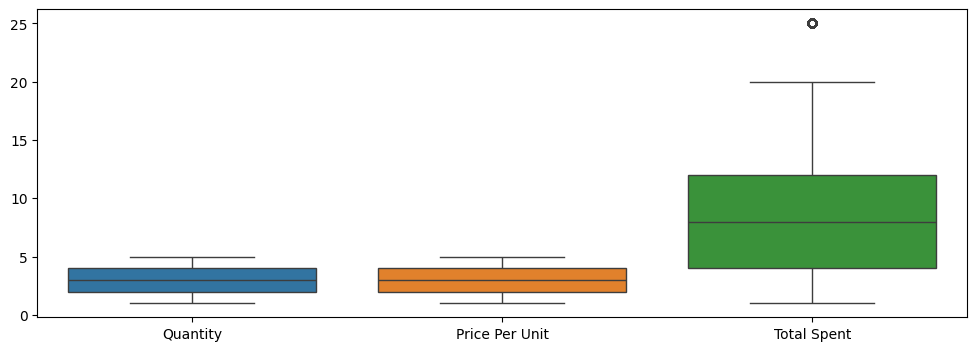

In [12]:
num_cols = ['Quantity', 'Price Per Unit', 'Total Spent']
df[num_cols].hist(bins=20, figsize=(12,5))
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,4))
sns.boxplot(data=df[num_cols])
plt.show()

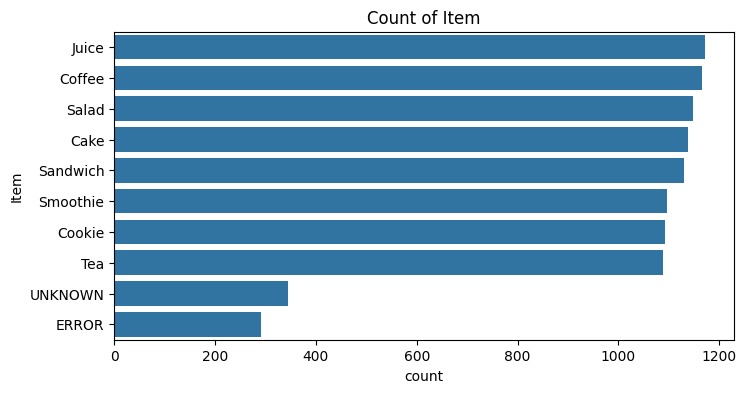

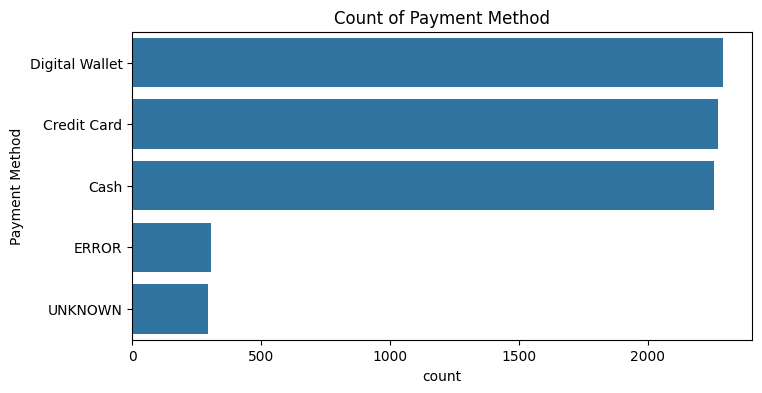

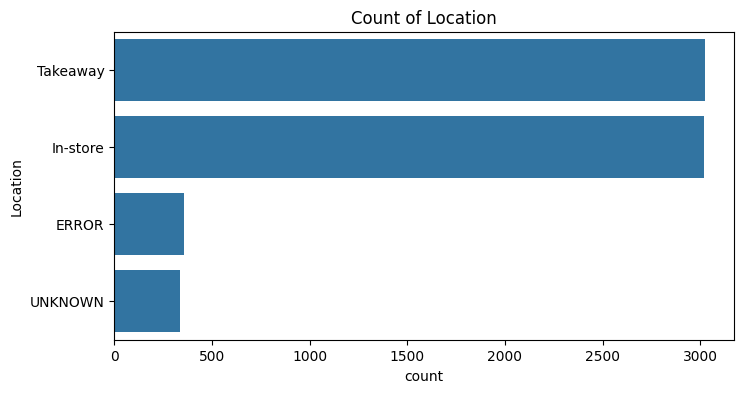

In [13]:
cat_cols = ['Item', 'Payment Method', 'Location']

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.show()

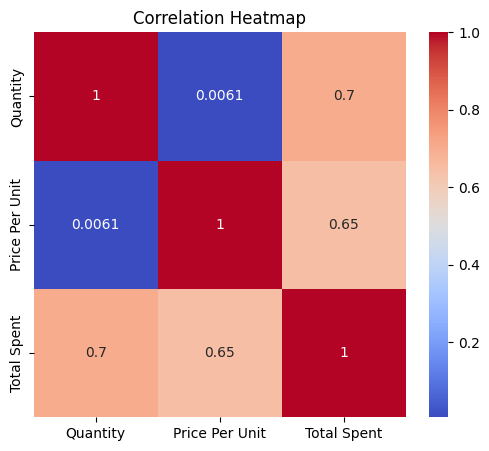

In [14]:
corr = df[num_cols].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [15]:
df.isna().sum()

df['Quantity'].fillna(df['Quantity'].median(), inplace=True)
df['Price Per Unit'].fillna(df['Price Per Unit'].median(), inplace=True)
df['Total Spent'].fillna(df['Total Spent'].median(), inplace=True)
df['Item'].fillna('Unknown', inplace=True)
df['Payment Method'].fillna(df['Payment Method'].mode()[0], inplace=True)
df['Location'].fillna(df['Location'].mode()[0], inplace=True)
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')  # преобразуем даты

C:\Users\user\AppData\Local\Temp\ipykernel_12716\436954214.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Quantity'].fillna(df['Quantity'].median(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_12716\436954214.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [16]:
df['UnitPriceCheck'] = df['Total Spent'] / df['Quantity']

df['Weekday'] = df['Transaction Date'].dt.day_name()

df['Hour'] = df['Transaction Date'].dt.hour
df['EveningSale'] = df['Hour'] >= 18

display(df.head())

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,UnitPriceCheck,Weekday,Hour,EveningSale
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08,2.0,Friday,0.0,False
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16,3.0,Tuesday,0.0,False
2,TXN_4271903,Cookie,4.0,1.0,8.0,Credit Card,In-store,2023-07-19,2.0,Wednesday,0.0,False
3,TXN_7034554,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27,5.0,Thursday,0.0,False
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11,2.0,Sunday,0.0,False


In [17]:
df_encoded = pd.get_dummies(df, columns=['Item', 'Payment Method', 'Location', 'Weekday'], drop_first=True)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols_scaled = ['Quantity', 'Price Per Unit', 'Total Spent', 'UnitPriceCheck', 'Hour']
df_encoded[num_cols_scaled] = scaler.fit_transform(df_encoded[num_cols_scaled])

display(df_encoded.head())

,Transaction ID,Quantity,Price Per Unit,Total Spent,Transaction Date,UnitPriceCheck,Hour,EveningSale,Item_Coffee,Item_Cookie,Item_ERROR,Item_Juice,Item_Salad,Item_Sandwich,Item_Smoothie,Item_Tea,Item_UNKNOWN,Item_Unknown,Payment Method_Credit Card,Payment Method_Digital Wallet,Payment Method_ERROR,Payment Method_UNKNOWN,Location_In-store,Location_Takeaway,Location_UNKNOWN,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,TXN_1961373,-0.741832,-0.765858,-0.832373,2023-09-08,-0.699361,0.0,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False
1,TXN_4977031,0.702686,0.038066,0.532746,2023-05-16,0.017614,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
2,TXN_4271903,0.702686,-1.569783,-0.149813,2023-07-19,-0.699361,0.0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True
3,TXN_7034554,-0.741832,1.645914,0.191466,2023-04-27,1.451564,0.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False
4,TXN_3160411,-0.741832,-0.765858,-0.832373,2023-06-11,-0.699361,0.0,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False


The data was “dirty”: numerical columns were stored as strings, there were missing values, and some dates were incorrect.
Missing values were filled using the median/mode, and dates were converted to datetime.
New features were created: UnitPriceCheck, Weekday, EveningSale.
Categorical data was One-Hot encoded, and numerical columns were standardized.
The dataset is now ready for use in a machine learning model: all columns are numeric, with no missing values.